In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import os
TITANIC_PATH = os.path.join("datasets", "titanic")

In [166]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
df = pd.DataFrame()
for row in test_data:
    df['PassengerId'] = test_data['PassengerId']

/Users/mariolawozniak/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


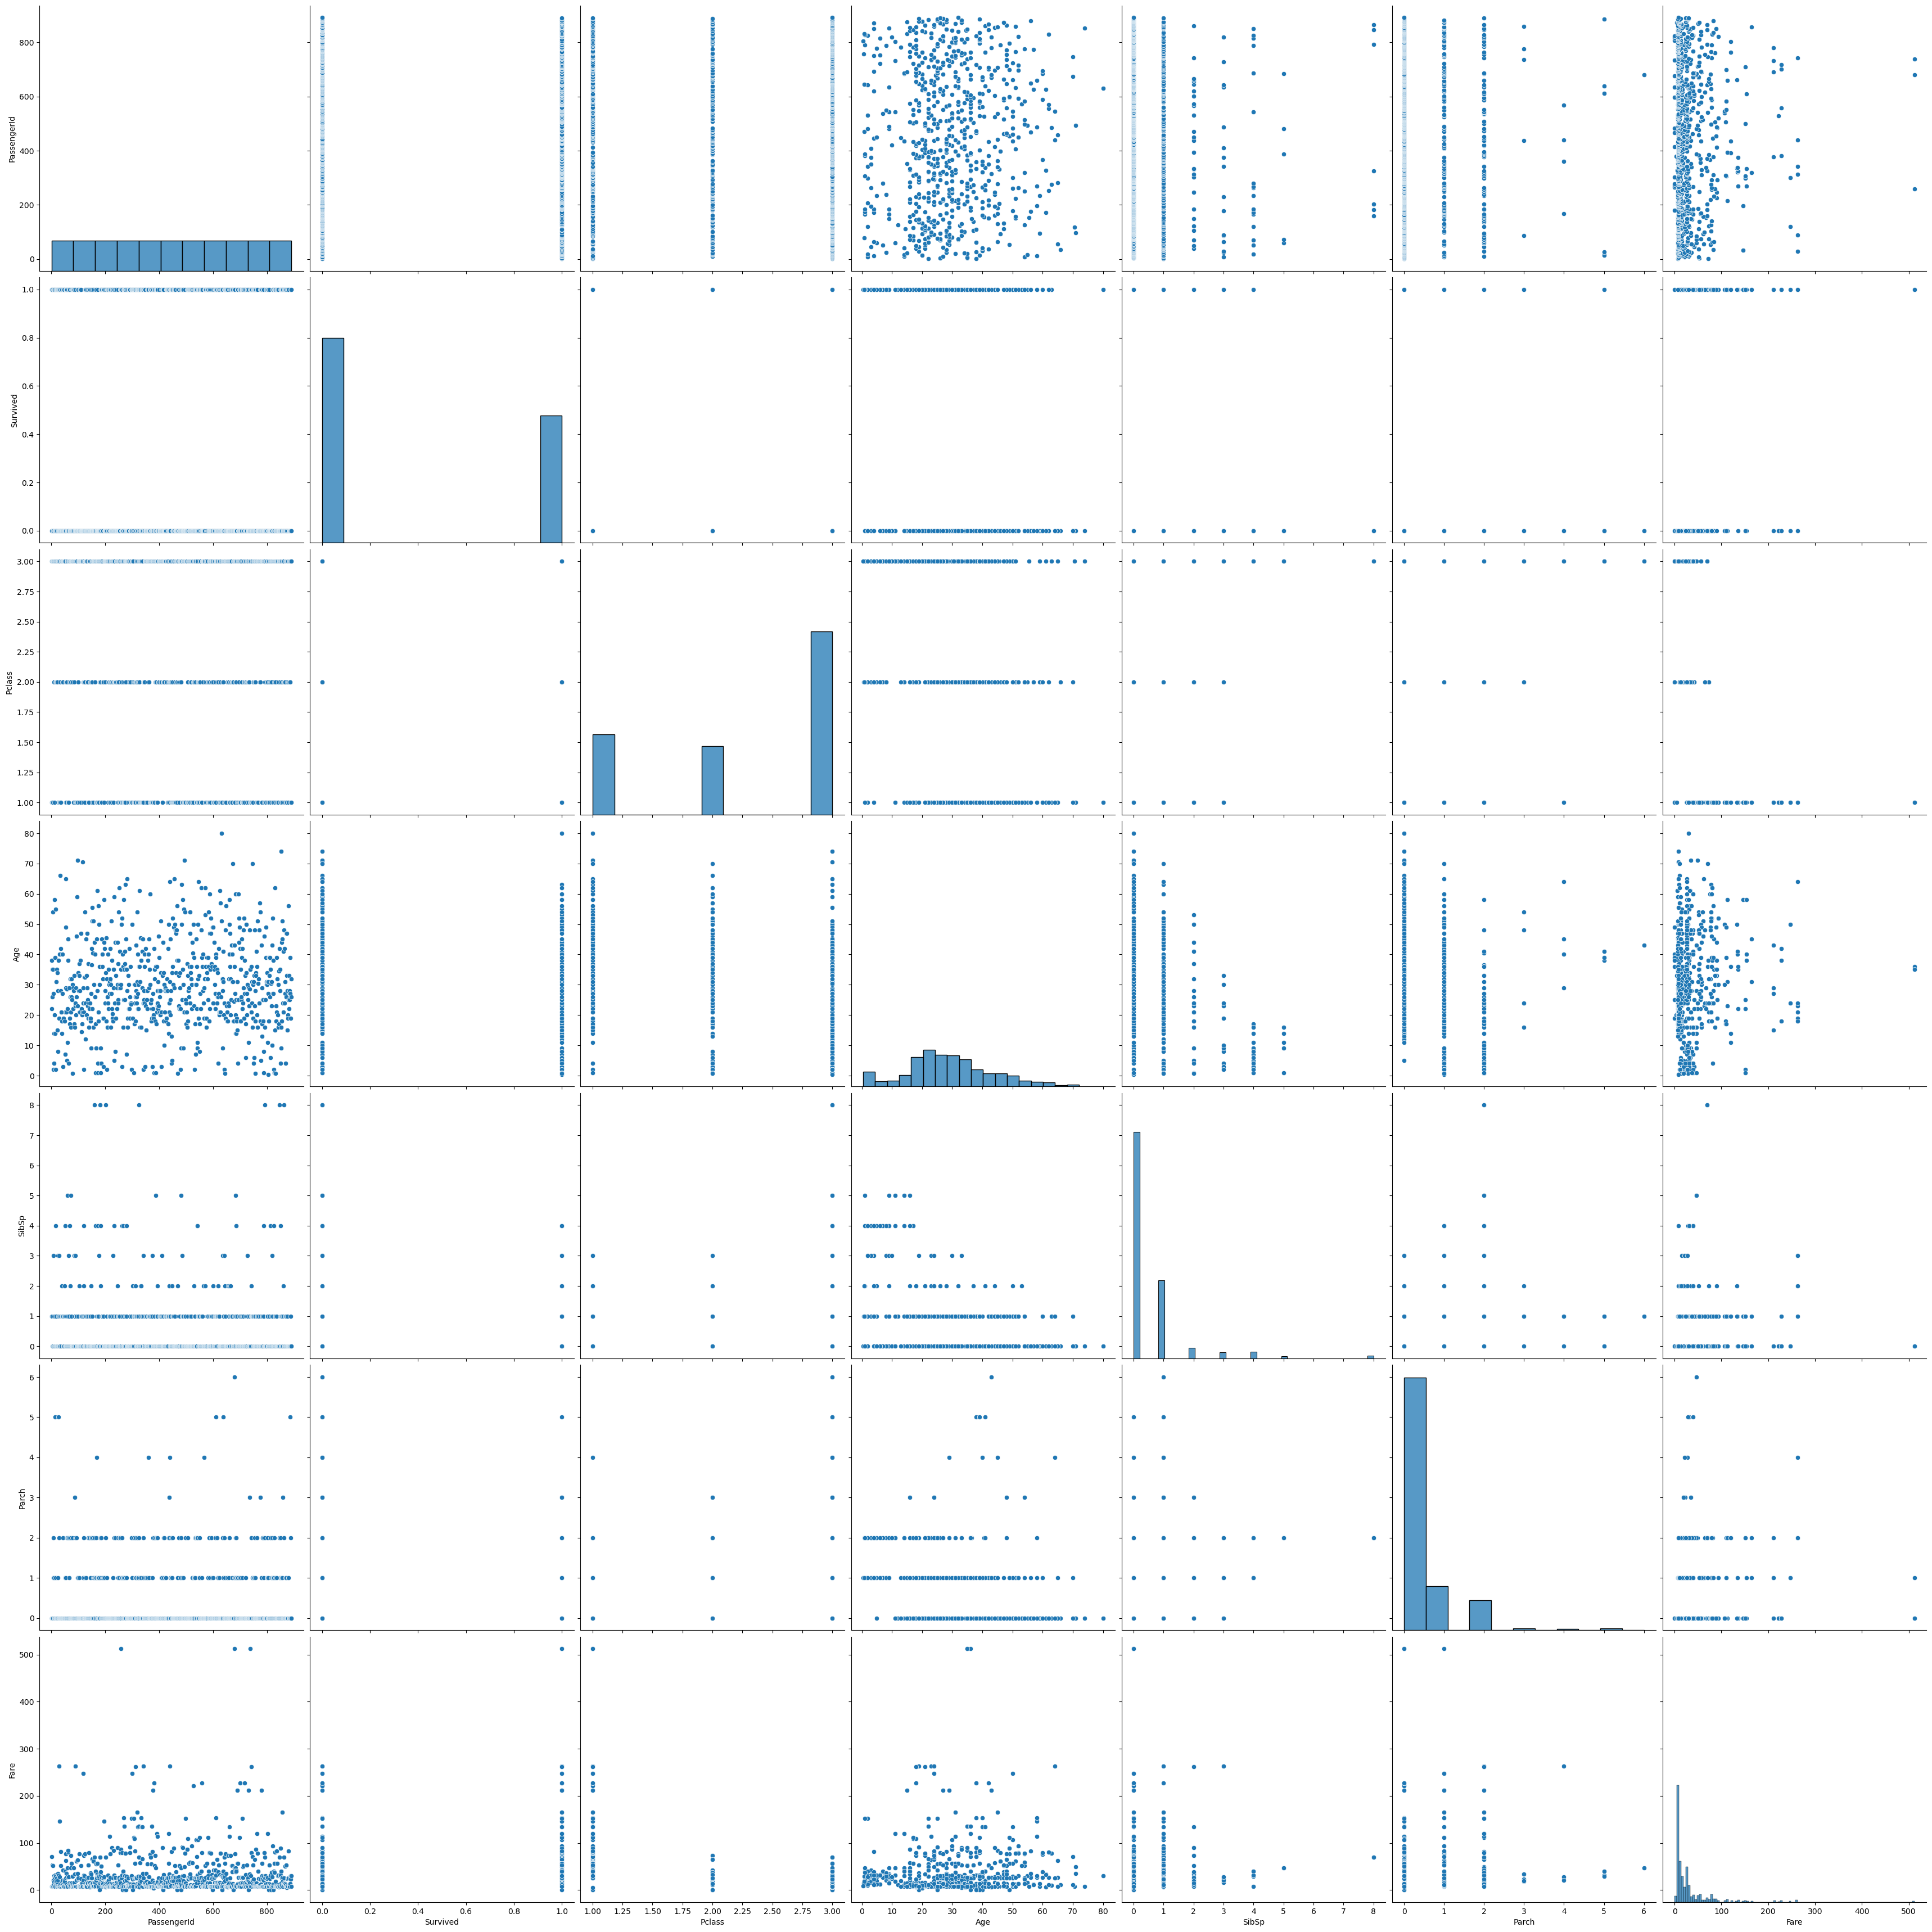

In [168]:
!pip3 install seaborn
import seaborn as sns

sns.pairplot(data=train_data, size=5)
plt.show()

In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin'] = train_data['Cabin'].fillna("")

train_data['Name_Len'] = train_data['Name'].str.split().str.len()
train_data['Sex'] = np.where(train_data['Sex'] == 'male', 1, 0)
train_data['Multiple_Cabins'] = np.where(train_data['Cabin'].str.len() >= 6, 5, 1)
train_data['Multiple_Cabins'] = np.where(train_data['Cabin'].str.len() == 0, 0, train_data['Multiple_Cabins'])
train_data[train_data['Multiple_Cabins'] > 0]

y = train_data['Survived']
train_data = train_data.drop(columns=['Survived', 'Cabin', 'Name', 'Ticket', 'PassengerId', 'Embarked'])

In [170]:
def preprocess(train_data):
    train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
    train_data['Cabin'] = train_data['Cabin'].fillna("")
    train_data['Name_Len'] = train_data['Name'].str.split().str.len()
    train_data['Sex'] = np.where(train_data['Sex'] == 'male', 1, 0)
    train_data['Multiple_Cabins'] = np.where(train_data['Cabin'].str.len() >= 6, 5, 1)
    train_data['Multiple_Cabins'] = np.where(train_data['Cabin'].str.len() == 0, 0, train_data['Multiple_Cabins'])
    train_data[train_data['Multiple_Cabins'] > 0]   
    train_data = train_data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId', 'Embarked'])
    return train_data

train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Len,Multiple_Cabins
0,3,1,22.0,1,0,7.2500,4,0
1,1,0,38.0,1,0,71.2833,7,1
2,3,0,26.0,0,0,7.9250,3,0
3,1,0,35.0,1,0,53.1000,7,1
4,3,1,35.0,0,0,8.0500,4,0


In [171]:

X = train_data.astype(float)

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    float64
 1   Sex              891 non-null    float64
 2   Age              891 non-null    float64
 3   SibSp            891 non-null    float64
 4   Parch            891 non-null    float64
 5   Fare             891 non-null    float64
 6   Name_Len         891 non-null    float64
 7   Multiple_Cabins  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [194]:
model = Sequential()
model.add(Dense(14, input_shape=(8,), activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(12, input_shape=(12,), activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(10, input_shape=(14,), activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(8, input_shape=(12,), activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(5, input_shape=(12,), activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(4, input_shape=(8,), activation='elu'))
model.add(Dense(1, input_shape=(3,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = 

In [195]:
model.fit(X, y, epochs = 500, validation_data=(X_test, y_test), validation_freq=1)
model.evaluate(X_test, y_test)

Epoch 1/500
28/28 [==============================] - 1s 5ms/step - loss: 2.1358 - accuracy: 0.5612 - val_loss: 0.8724 - val_accuracy: 0.3881
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 1.4926 - accuracy: 0.5241 - val_loss: 0.8231 - val_accuracy: 0.3582
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 1.2945 - accuracy: 0.4882 - val_loss: 0.7997 - val_accuracy: 0.3955
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 1.0305 - accuracy: 0.5129 - val_loss: 0.7776 - val_accuracy: 0.4030
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.5443 - val_loss: 0.7399 - val_accuracy: 0.4627
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.5275 - val_loss: 0.7079 - val_accuracy: 0.5672
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5387 - val_loss: 0.6732 - val_accuracy: 0.6269
Epoch 8/500
2

[0.3953475058078766, 0.8208954930305481]

In [196]:
tst = preprocess(test_data)

In [197]:
preds = model.predict(tst)


14/14 [==============================] - 0s 555us/step


In [198]:
for i in range(0,len(preds)):
    preds[i] = 1 if preds[i] > 0.5 else 0
df['Survived']=preds.astype(int)


In [199]:
df.head()


,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,1


In [200]:
df.to_csv("res.csv", index=False)